In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [4]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

In [5]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [6]:
# shuffle the input data
import random
random.shuffle(image_data)

In [7]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

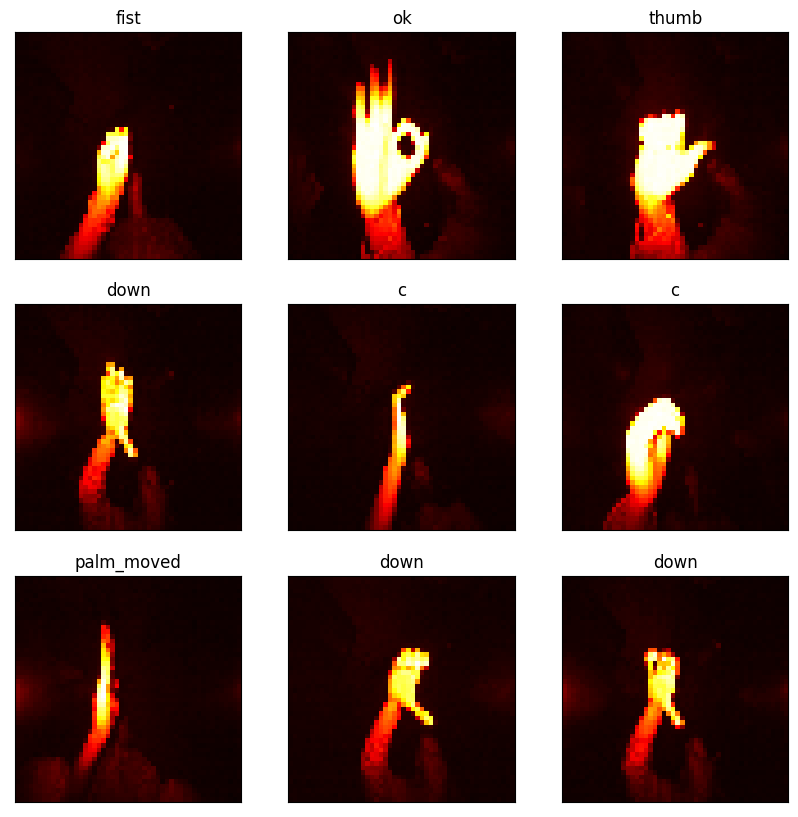

In [8]:
label[:10]
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [9]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [10]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [11]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
model = keras.models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [13]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [14]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 90s 202ms/step - loss: 1.6005 - accuracy: 0.3671 - val_loss: 0.6115 - val_accuracy: 0.7578
Epoch 2/7
438/438 [==============================] - 88s 200ms/step - loss: 0.2247 - accuracy: 0.9346 - val_loss: 0.0334 - val_accuracy: 0.9930
Epoch 3/7
438/438 [==============================] - 88s 201ms/step - loss: 0.0802 - accuracy: 0.9840 - val_loss: 0.0210 - val_accuracy: 0.9965
Epoch 4/7
438/438 [==============================] - 88s 200ms/step - loss: 0.0608 - accuracy: 0.9904 - val_loss: 0.0117 - val_accuracy: 0.9980
Epoch 5/7
438/438 [==============================] - 88s 201ms/step - loss: 0.0437 - accuracy: 0.9923 - val_loss: 0.0064 - val_accuracy: 0.9985
Epoch 6/7
438/438 [==============================] - 87s 199ms/step - loss: 0.0406 - accuracy: 0.9932 - val_loss: 0.0026 - val_accuracy: 0.9997
Epoch 7/7
438/438 [==============================] - 88s 200ms/step - loss: 0.0283 - accuracy: 0.9943 - val_loss: 0.0102 - val_accuracy:

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 7s 36ms/step - loss: 0.0102 - accuracy: 0.9993
Test accuracy: 99.93%


In [16]:
original_w = model.get_weights()

In [17]:
num_layers=8

In [18]:
accuracys=[]
x=num_layers
for i in range(len(original_w)-2,len(original_w)-1-2*num_layers,-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]+scalar)
      else:
        new_w.append(original_w[w])
    model.set_weights(new_w)
    evaluation = model.evaluate(X_test, y_test)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model.set_weights(original_w)
  x-=1
  model.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 8
188/188 [==============================] - 7s 36ms/step - loss: 0.0102 - accuracy: 0.9993
Scallar 0.001 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 36ms/step - loss: 0.0102 - accuracy: 0.9993
Scallar 0.01 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 36ms/step - loss: 0.0102 - accuracy: 0.9993
Scallar 0.1 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 38ms/step - loss: 0.0102 - accuracy: 0.9993
Scallar 0.5 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 36ms/step - loss: 0.0102 - accuracy: 0.9993
Scallar 0.75 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 36ms/step - loss: 0.0102 - accuracy: 0.9993
Scallar 1.5 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 36ms/step - loss: 0.0102 - accuracy: 0.9993
Scallar 1.75 --> test accuracy 0.9993333220481873
188/188 [===

In [19]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.9993333220481873, 0.34394444359673393, 0.2935185126132435, 0.33124073843161267, 0.4259814785586463, 0.3693518489599228, 0.3188148107793596, 0.26496296044852996]


In [20]:
scalars= [0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]

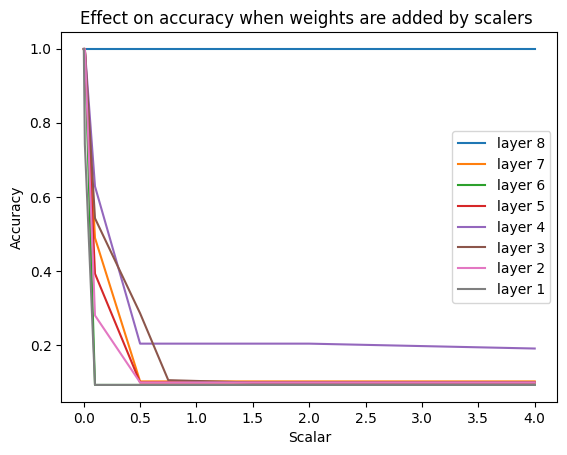

In [21]:
import matplotlib.pyplot as plt
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are added by scalers ')
plt.legend()
plt.show()

In [22]:
accuracys=[]
x=num_layers
for i in range(len(original_w)-2,len(original_w)-1-2*num_layers,-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]*scalar)
      else:
        new_w.append(original_w[w])
    model.set_weights(new_w)
    evaluation = model.evaluate(X_test, y_test)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model.set_weights(original_w)
  x-=1
  model.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 8
188/188 [==============================] - 7s 36ms/step - loss: 2.2550 - accuracy: 0.3400
Scallar 0.001 --> test accuracy 0.3400000035762787
188/188 [==============================] - 7s 36ms/step - loss: 1.8220 - accuracy: 0.9965
Scallar 0.01 --> test accuracy 0.9965000152587891
188/188 [==============================] - 7s 36ms/step - loss: 0.1667 - accuracy: 0.9993
Scallar 0.1 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 38ms/step - loss: 0.0062 - accuracy: 0.9993
Scallar 0.5 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 36ms/step - loss: 0.0079 - accuracy: 0.9993
Scallar 0.75 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 36ms/step - loss: 0.0151 - accuracy: 0.9993
Scallar 1.5 --> test accuracy 0.9993333220481873
188/188 [==============================] - 7s 36ms/step - loss: 0.0176 - accuracy: 0.9993
Scallar 1.75 --> test accuracy 0.9993333220481873
188/188 [===

In [23]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.9257592525747087, 0.8762592540846931, 0.8233518393503295, 0.8019444321592649, 0.7978518356879553, 0.7934999879863527, 0.7795740647448434, 0.7314999865161048]


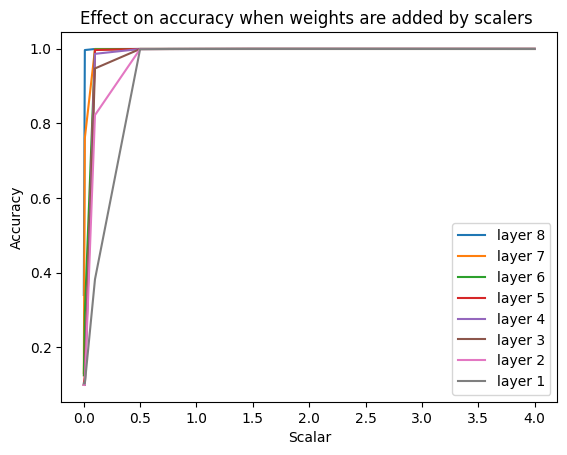

In [24]:
import matplotlib.pyplot as plt
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are multipy by scalers ')
plt.legend()
plt.show()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        